In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy
from scipy import ndimage

In [3]:
X_train = pd.read_csv('input/trainData.csv')
y_train = pd.read_csv('input/trainLabels.csv')
X_test = pd.read_csv('input/kaggleTestSubset.csv')
y_test = pd.read_csv('input/kaggleTestSubsetLabels.csv')

In [4]:
labels = [1, 3, 4, 8]
for l in labels:
    print("For l = " + str(l) + ', ', np.count_nonzero(y_train == l))

#We can see that all labels have somewhat equal representation in our training data

For l = 1,  3322
For l = 3,  2995
For l = 4,  2869
For l = 8,  2833


In [5]:
knn_model_bit = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=6, metric='minkowski', p=2, n_jobs=-1, weights='distance')
knn_model_bit.fit(X_train, y_train.Label)
pred_bit = knn_model_bit.predict(X_test)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
knn_model_scaled = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=6, metric='minkowski', p=2, n_jobs=-1, weights='distance')
knn_model_scaled.fit(X_train_scaled, y_train.Label)
pred_scaled = knn_model_scaled.predict(X_test_scaled)
accuracy_score(y_test, pred_scaled)

0.97242718446601939

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
knn_model_scaled = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=6, metric='minkowski', p=2, n_jobs=-1, weights='distance')
knn_model_scaled.fit(X_train_scaled, y_train.Label)
pred_scaled = knn_model_scaled.predict(X_test_scaled)
accuracy_score(y_test, pred_scaled)

0.98330097087378643

In [31]:
def sobel_process(X):
    sobel = []
    for im in range(X.shape[0]):
#         image = im.reshape((28,28))
#         sobel.append(ndimage.sobel(image).reshape(784))
        image = np.array(X.iloc[im]).reshape((28,28))
        image = ndimage.sobel(image).flatten()
        
        sobel.append(image)

    return sobel

X_train_sobel = sobel_process(X_train)
X_test_sobel = sobel_process(X_test)
knn_model_sobel = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=6, metric='minkowski', p=2, n_jobs=-1, weights='distance')
knn_model_sobel.fit(X_train_sobel, y_train.Label)
pred_sobel = knn_model_sobel.predict(X_test_sobel)
accuracy_score(pred_sobel, y_test)

0.97203883495145627

In [86]:
i =0

405


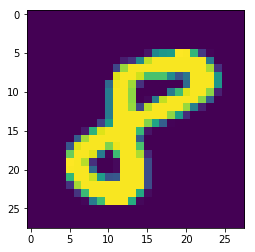

In [91]:
boo = False

while boo != True:
    if (pred_scaled[i] != y_test.Label[i]):
        img = X_train.iloc[i].values.reshape((28, 28))
        plt.imshow(img)
        boo = True
        print(i)
    i += 1 
    


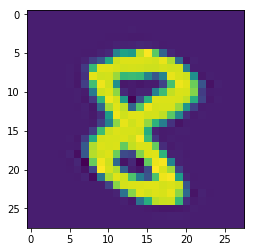

In [93]:
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

imx = deskew(X_train.iloc[405].values.reshape((28, 28)))
plt.imshow(imx)

In [123]:
def preprocess_X(X):
    result = []
    values = X.values
    for v in values:
        curr = v.reshape((28, 28))
        curr = deskew(curr)
        result.append(curr.flatten())
        
    return result


time_in = time.time()
deskewed_train = preprocess_X(X_train/255)
deskewed_test = preprocess_X(X_test/255)
time_in = time.time() - time_in
print(time_in)

5.179606914520264


In [107]:
knn_model_desk = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=6, metric='minkowski', p=3, n_jobs=-1, weights='distance')
knn_model_desk.fit(deskewed_train, y_train.Label)
pred_desk = knn_model_desk.predict(deskewed_test)
accuracy_score(pred_desk, y_test)

0.99300970873786409

In [105]:
def sobel(X):
    sobel = []
    for im in range(len(X)):
        image = X[im].reshape((28,28))
        sobel.append(ndimage.sobel(image).reshape(784))
#         image = np.array(X.iloc[im]).reshape((28,28))
#         image = ndimage.sobel(image).flatten()
        
#         sobel.append(image)

    return sobel

X_train_sobel = sobel(deskewed_train)
X_test_sobel = sobel(deskewed_test)
knn_model_sobel = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=6, metric='minkowski', p=2, n_jobs=-1, weights='distance')
knn_model_sobel.fit(X_train_sobel, y_train.Label)
pred_sobel = knn_model_sobel.predict(X_test_sobel)
accuracy_score(pred_sobel, y_test)

0.98990291262135921

In [32]:
from numpy import fft
def fourier_process(X):
    fourier = []
    for im in range(X.shape[0]):
#         image = im.reshape((28,28))
#         sobel.append(ndimage.sobel(image).reshape(784))
        image = np.array(X.iloc[im]).reshape((28,28))
        image = fft.fft2(image).flatten()
        
        fourier.append(image)

    return fourier

X_train_fourier = fourier_process(X_train)
X_test_fourier = fourier_process(X_test)
knn_model_fourier = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=6, metric='minkowski', p=2, n_jobs=-1, weights='distance')
knn_model_fourier.fit(X_train_fourier, y_train.Label)
pred_fourier = knn_model_fourier.predict(X_test_sobel)

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [34]:
from scipy import ndimage as ndi
from skimage import feature

def canny_process(X):
    canny = []
    for im in range(X.shape[0]):
#         image = im.reshape((28,28))
#         sobel.append(ndimage.sobel(image).reshape(784))
        image = np.array(X.iloc[im]).reshape((28,28))
        image = feature.canny(image, sigma=3).flatten()
        
        canny.append(image)

    return canny

X_train_canny = canny_process(X_train)
X_test_canny = canny_process(X_test)
knn_model_canny = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=6, metric='minkowski', p=2, n_jobs=-1, weights='distance')
knn_model_canny.fit(X_train_canny, y_train.Label)
pred_canny = knn_model_canny.predict(X_test_canny)

In [36]:
accuracy_score(pred_canny, y_test)

0.26058252427184464

In [25]:
import time

For k = 1 Accuracy was: 0.982524271845, Time Taken: 20.46740698814392
For k = 2 Accuracy was: 0.982524271845, Time Taken: 14.998618841171265
For k = 3 Accuracy was: 0.983300970874, Time Taken: 14.408488035202026
For k = 4 Accuracy was: 0.982912621359, Time Taken: 14.749805927276611
For k = 5 Accuracy was: 0.982912621359, Time Taken: 15.235103845596313
For k = 6 Accuracy was: 0.983300970874, Time Taken: 15.741915225982666
For k = 7 Accuracy was: 0.98213592233, Time Taken: 14.002870082855225
For k = 8 Accuracy was: 0.980970873786, Time Taken: 13.967812061309814
For k = 9 Accuracy was: 0.980582524272, Time Taken: 13.648880958557129


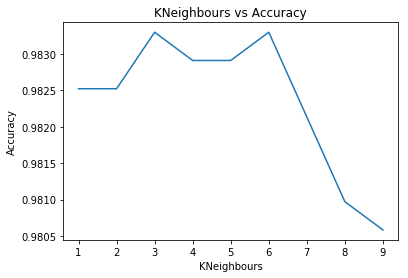

In [27]:
accuracy = []
def neighbour_accuracy(X_train, y_train, X_test, y_test, initial_i = 1, final_i = 10):
    for i in range(initial_i, final_i):
        knn_model = KNeighborsClassifier(algorithm='auto', n_neighbors=i, metric='minkowski', p=2, n_jobs=-1, weights='distance')
        knn_model.fit(X=X_train, y=y_train.Label)
        
        pred_time = time.time()
        pred = knn_model.predict(X_test)
        pred_time = time.time() - pred_time
        
        _ = accuracy_score(y_test, pred)
        print("For k = " + str(i) + " Accuracy was: " + str(_) + ", Time Taken: " + str(pred_time))
        accuracy.append(_)
    
neighbour_accuracy(X_train, y_train, X_test, y_test)
x = range(1, 10)
plt.plot(x, accuracy)
plt.title("KNeighbours vs Accuracy")
plt.xlabel('KNeighbours')
plt.ylabel('Accuracy')

In [28]:
accuracy = []
def neighbour_accuracy(X_train, y_train, X_test, y_test, initial_i = 1, final_i = 10):
    for i in range(initial_i, final_i):
        knn_model = KNeighborsClassifier(algorithm='auto', n_neighbors=i, metric='minkowski', p=2, n_jobs=-1, weights='distance')
        knn_model.fit(X=X_train, y=y_train.Label)
        
        pred_time = time.time()
        pred = knn_model.predict(X_test)
        pred_time = time.time() - pred_time
        
        _ = accuracy_score(y_test, pred)
        print("For k = " + str(i) + " Accuracy was: " + str(_) + ", Time Taken: " + str(pred_time))
        accuracy.append(_)
    
neighbour_accuracy(X_train/255, y_train, X_test/255, y_test)
x = range(1, 10)
plt.plot(x, accuracy)
plt.title("KNeighbours vs Accuracy")
plt.xlabel('KNeighbours')
plt.ylabel('Accuracy')

For k = 1 Accuracy was: 0.982524271845, Time Taken: 13.878660917282104
For k = 2 Accuracy was: 0.982524271845, Time Taken: 16.23191809654236
For k = 3 Accuracy was: 0.983300970874, Time Taken: 16.871883153915405
For k = 4 Accuracy was: 0.982912621359, Time Taken: 16.221649885177612
For k = 5 Accuracy was: 0.982912621359, Time Taken: 15.458196878433228
For k = 6 Accuracy was: 0.983300970874, Time Taken: 16.419701099395752


KeyboardInterrupt: 

In [12]:
# fig = plt.figure()
# plt.gray()
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)  # right side
# img = np.array(X_train.iloc[0]).reshape((28, 28))
# sobel_filtered = ndimage.sobel(img, axis=1)
# ax1.imshow(img)
# ax2.imshow(sobel_filtered)

# Feature Extraction

In [169]:
# Lets do some preprocessing on our train set
# And some feature extraction
def brightnessRatio(image):
    count = 0
    for i in image:
        if i >= 0.5:
            count += 1/784
    return count


def preprocessing(X):
    sobel = []
    for im in range(X.shape[0]):
#         image = im.reshape((28,28))
#         sobel.append(ndimage.sobel(image).reshape(784))
        image = np.array(X.iloc[im]).reshape((28,28))
        image = ndimage.sobel(image).flatten()
        
        features = np.ndarray((785))
        features[0:784] = image
        features[-1] = brightnessRatio(image)
        
        sobel.append(features)

    return sobel

# sob = preprocessing(X_train)

def addBrightness(X):
    V = np.ndarray((len(X), 785))
    for i in range(len(X)):
        img = np.array(X[i])
        _ = brightnessRatio(img)
        V[i, 0:784] = X[i]
        V[i, -1] = _
    return V

In [331]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [332]:
X_train = addBrightness(X_train)
X_test = addBrightness(X_test)

In [366]:
knn_model.fit(X=X_train, y=y_train.Label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
           weights='distance')

In [367]:
knn_pred = knn_model.predict(X_test)

In [368]:
accuracy_score(y_test, pred)

0.98368932038834955

In [117]:
model = DecisionTreeClassifier(criterion='gini', max_depth=400)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.92155339805825243

# Calculating Accuracy scores for Different Parameters

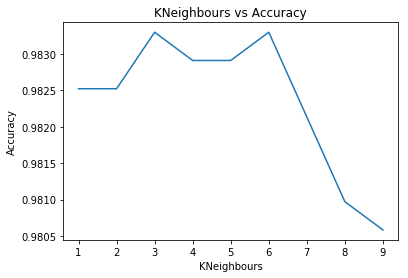

In [108]:
from sklearn.decomposition import PCA # Principal Component Analysis module

In [27]:
X_std = StandardScaler().fit_transform(X_train)

In [84]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [85]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [88]:
varsdf = pd.Series(var_exp)

In [97]:
np.count_nonzero(varsdf < 4.7212626481160241e-06+0j)

168

In [98]:
# ^ thats how many dimensions that contribute less than 4.7 * 10-6 to our dataset so we can remove these dimesniosn


In [99]:
x_newdim = pca.fit_transform(X_std)

In [103]:
knn_model.fit(X=x_newdim, y=Y.Label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=3,
           weights='uniform')

In [111]:
# scale the test data
def reduce_dimensions(X, r_comp = 200):
    pca = PCA(n_components=r_comp)
    X_scaled = StandardScaler().fit_transform(X)
#     print(len(X_scaled[0]))
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Create a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
    # Sort from high to low
    eig_pairs.sort(key = lambda x: x[0], reverse= True)
    # Calculation of Explained Variance from the eigenvalues
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    x_newdim = pca.fit_transform(X_scaled)
    return x_newdim


In [263]:
X_train_red = reduce_dimensions(X_train, 100)
X_test_red = reduce_dimensions(X_test, 100)

784
784


In [264]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.9227184466019418

In [326]:
acc = []
def depth_increase():
    j = 0
    for i in range(1, 30, 1):
        model = DecisionTreeClassifier(max_depth=i, criterion='entropy')
        model.fit(X_train, y_train)
        acc.append(accuracy_score(y_test, model.predict(X_test)))
        print(acc[j])
        j+=1
depth_increase()

In [122]:
def checkcomponents():
    for i in range(50, 500, 50):
        X_train_red = reduce_dimensions(X_train, i)
        X_test_red = reduce_dimensions(X_test, i)
        acc = []
        print("Dimensions= " + str(i) + " ", end='')
        for k in range(1, i, 50):
            model = DecisionTreeClassifier(max_depth=k, criterion = "entropy")
            model.fit(X_train_red, y_train)
            acc.append(accuracy_score(y_test, model.predict(X_test_red)))
        print(np.max(acc))
checkcomponents()

Dimensions= 50 0.502912621359
Dimensions= 100 0.70640776699
Dimensions= 150 0.741747572816
Dimensions= 200 0.737087378641
Dimensions= 250 0.742524271845
Dimensions= 300 0.747961165049
Dimensions= 350 0.734757281553
Dimensions= 400 

KeyboardInterrupt: 

In [363]:
# X_train_red = reduce_dimensions(X_train, 700)
# X_test_red = reduce_dimensions(X_test, 700)

model = DecisionTreeClassifier(max_depth=11, criterion='entropy')
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))
tree_pred = model.predict(X_test)

In [353]:

tree_pred

array([8, 3, 3, ..., 8, 1, 4])

In [369]:
z = knn_model.predict_proba(X_test)

In [370]:
z

array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.15687388,  0.        ,  0.84312612,  0.        ]])

In [420]:
def index_to_class(index):
    if index == 0:
        return 1
    elif index == 1:
        return 3
    elif index == 2:
        return 4
    else:
        return 8


def predictions(knn_pred, tree_pred, knn_pred_prob):
    prediciton = []
    for i in range(0, len(knn_pred)):
        max_prob_class = knn_pred[i]
        curr = list(knn_pred_prob[i])
        if 1 not in curr:
            if (max(curr) < 0.5):
                curr.remove(max(curr))
                max_prob_class = index_to_class(curr.index(max(curr)))
                if tree_pred[i] != max_prob_class:
                    max_prob_class = tree_pred[i]
        prediciton.append(max_prob_class)
    return prediciton

In [421]:
pred = predictions(knn_pred, tree_pred, z)

In [422]:
accuracy_score(y_test, pred)

0.98330097087378643

Help on built-in function remove:

remove(...) method of builtins.list instance
    L.remove(value) -> None -- remove first occurrence of value.
    Raises ValueError if the value is not present.

